# **Title of Project**

# **Movie Recommendation System**

-------------

## **Objective**

The objective of the movie recommendation system is to suggest movies tailored to individual tastes and viewing history, thereby enhancing user enjoyment and engagement. This personalization is crucial as it not only increases user satisfaction and loyalty but also helps users discover new movies and genres they may not have considered otherwise. Additionally, it saves users time in their search for the perfect film, making their overall experience more enjoyable and efficient.

---




## **Data Source**

When building a movie recommendation system, several data sources can be used to give users personalized suggestions. This includes ratings and reviews from websites like IMDb, Rotten Tomatoes, or Metacritic, as well as information about the movies themselves, such as the genre, director, actors, release date, and a brief summary. We can also look at how users interact with the system, like what they search for, what they browse, and what they watch. Furthermore, we can use social media and online platforms like Facebook, Twitter, or Reddit to see what users like, dislike, and talk about when it comes to movies. We can also use something called knowledge graphs, which are like maps of information that show how different things are related to each other. There are many datasets available that we can use to build a movie recommendation system, including MovieLens, Netflix Prize Dataset, IMDb, Rotten Tomatoes, and Amazon Movie Reviews. By combining and processing these datasets, we can create a system that gives users personalized movie recommendations.

## **Import Library**

In [ ]:
!pip install pandas scikit-learn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



## **Import Data**

In [ ]:
movies = pd.read_csv("/Movies Recommendation.csv")
movies

,Movie_ID,Movie_Title,Movie_Genre,Movie_Language,Movie_Budget,Movie_Popularity,Movie_Release_Date,Movie_Revenue,Movie_Runtime,Movie_Vote,...,Movie_Homepage,Movie_Keywords,Movie_Overview,Movie_Production_House,Movie_Production_Country,Movie_Spoken_Language,Movie_Tagline,Movie_Cast,Movie_Crew,Movie_Director
0,1,Four Rooms,Crime Comedy,en,4000000,22.876230,09-12-1995,4300000,98.0,6.5,...,NaN,hotel new year's eve witch bet hotel room,It's Ted the Bellhop's first night on the job....,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,"[{'name': 'Allison Anders', 'gender': 1, 'depa...",Allison Anders
1,2,Star Wars,Adventure Action Science Fiction,en,11000000,126.393695,25-05-1977,775398007,121.0,8.1,...,http://www.starwars.com/films/star-wars-episod...,android galaxy hermit death star lightsaber,Princess Leia is captured and held hostage by ...,"[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Twe...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,"[{'name': 'George Lucas', 'gender': 2, 'depart...",George Lucas
2,3,Finding Nemo,Animation Family,en,94000000,85.688789,30-05-2003,940335536,100.0,7.6,...,http://movies.disney.com/finding-nemo,father son relationship harbor underwater fish...,"Nemo, an adventurous young clownfish, is unexp...","[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","There are 3.7 trillion fish in the ocean, they...",Albert Brooks Ellen DeGeneres Alexander Gould ...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
3,4,Forrest Gump,Comedy Drama Romance,en,55000000,138.133331,06-07-1994,677945399,142.0,8.2,...,NaN,vietnam veteran hippie mentally disabled runni...,A man with a low IQ has accomplished great thi...,"[{""name"": ""Paramount Pictures"", ""id"": 4}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","The world will never be the same, once you've ...",Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,"[{'name': 'Alan Silvestri', 'gender': 2, 'depa...",Robert Zemeckis
4,5,American Beauty,Drama,en,15000000,80.878605,15-09-1999,356296601,122.0,7.9,...,http://www.dreamworks.com/ab/,male nudity female nudity adultery midlife cri...,"Lester Burnham, a depressed suburban father in...","[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Look closer.,Kevin Spacey Annette Bening Thora Birch Wes Be...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4755,4784,Midnight Cabaret,Horror,en,0,0.001389,01-01-1990,0,94.0,0.0,...,NaN,NaN,A Broadway producer puts on a play with a Devi...,[],[],"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The hot spot where Satan's waitin'.,Lisa Hart Carroll Michael Des Barres Paul Drak...,"[{'name': 'Pece Dingo', 'gender': 0, 'departme...",Pece Dingo
4756,4785,Growing Up Smith,Comedy Family Drama,en,0,0.710870,03-02-2017,0,102.0,7.4,...,http://www.growingupsmithmovie.com,NaN,"In 1979, an Indian family moves to America wit...",[],[],"[{""iso_639_1"": ""en"", ""name"": ""English""}]",It’s better to stand out than to fit in.,Roni Akurati Brighton Sharbino Jason Lee Anjul...,"[{'name': 'Frank Lotito', 'gender': 0, 'depart...",Frank Lotito
4757,4786,8 Days,Thriller Drama,en,0,0.015295,15-06-2014,0,90.0,0.0,...,NaN,christian film sex trafficking,"After sneaking to a party with her friends, 16...","[{""name"": "

In [ ]:
movies.head()

,Movie_ID,Movie_Title,Movie_Genre,Movie_Language,Movie_Budget,Movie_Popularity,Movie_Release_Date,Movie_Revenue,Movie_Runtime,Movie_Vote,...,Movie_Homepage,Movie_Keywords,Movie_Overview,Movie_Production_House,Movie_Production_Country,Movie_Spoken_Language,Movie_Tagline,Movie_Cast,Movie_Crew,Movie_Director
0,1,Four Rooms,Crime Comedy,en,4000000,22.876230,09-12-1995,4300000,98.0,6.5,...,NaN,hotel new year's eve witch bet hotel room,It's Ted the Bellhop's first night on the job....,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,"[{'name': 'Allison Anders', 'gender': 1, 'depa...",Allison Anders
1,2,Star Wars,Adventure Action Science Fiction,en,11000000,126.393695,25-05-1977,775398007,121.0,8.1,...,http://www.starwars.com/films/star-wars-episod...,android galaxy hermit death star lightsaber,Princess Leia is captured and held hostage by ...,"[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Twe...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,"[{'name': 'George Lucas', 'gender': 2, 'depart...",George Lucas
2,3,Finding Nemo,Animation Family,en,94000000,85.688789,30-05-2003,940335536,100.0,7.6,...,http://movies.disney.com/finding-nemo,father son relationship harbor underwater fish...,"Nemo, an adventurous young clownfish, is unexp...","[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","There are 3.7 trillion fish in the ocean, they...",Albert Brooks Ellen DeGeneres Alexander Gould ...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
3,4,Forrest Gump,Comedy Drama Romance,en,55000000,138.133331,06-07-1994,677945399,142.0,8.2,...,NaN,vietnam veteran hippie mentally disabled runni...,A man with a low IQ has accomplished great thi...,"[{""name"": ""Paramount Pictures"", ""id"": 4}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","The world will never be the same, once you've ...",Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,"[{'name': 'Alan Silvestri', 'gender': 2, 'depa...",Robert Zemeckis
4,5,American Beauty,Drama,en,15000000,80.878605,15-09-1999,356296601,122.0,7.9,...,http://www.dreamworks.com/ab/,male nudity female nudity adultery midlife cri...,"Lester Burnham, a depressed suburban father in...","[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Look closer.,Kevin Spacey Annette Bening Thora Birch Wes Be...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4760 entries, 0 to 4759
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Movie_ID                  4760 non-null   int64  
 1   Movie_Title               4760 non-null   object 
 2   Movie_Genre               4760 non-null   object 
 3   Movie_Language            4760 non-null   object 
 4   Movie_Budget              4760 non-null   int64  
 5   Movie_Popularity          4760 non-null   float64
 6   Movie_Release_Date        4760 non-null   object 
 7   Movie_Revenue             4760 non-null   int64  
 8   Movie_Runtime             4758 non-null   float64
 9   Movie_Vote                4760 non-null   float64
 10  Movie_Vote_Count          4760 non-null   int64  
 11  Movie_Homepage            1699 non-null   object 
 12  Movie_Keywords            4373 non-null   object 
 13  Movie_Overview            4757 non-null   object 
 14  Movie_Pr

In [ ]:
movies.shape

(4760, 21)

In [ ]:
movies.size

99960

## **Describe Data**

In [ ]:
movies.describe()

,Movie_ID,Movie_Budget,Movie_Popularity,Movie_Revenue,Movie_Runtime,Movie_Vote,Movie_Vote_Count
count,4760.000000,4.760000e+03,4760.000000,4.760000e+03,4758.000000,4760.000000,4760.000000
mean,2382.566387,2.920129e+07,21.599510,8.263743e+07,107.184111,6.113866,692.508403
std,1377.270159,4.075620e+07,31.887919,1.630554e+08,21.960332,1.141294,1235.007337
min,1.000000,0.000000e+00,0.000372,0.000000e+00,0.000000,0.000000,0.000000
25%,1190.750000,9.257500e+05,4.807074,0.000000e+00,94.000000,5.600000,55.000000
50%,2380.500000,1.500000e+07,13.119058,1.944716e+07,104.000000,6.200000,238.000000
75%,3572.250000,4.000000e+07,28.411929,9.341276e+07,118.000000,6.800000,740.250000
max,4788.000000,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


## **Data Visualization**

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


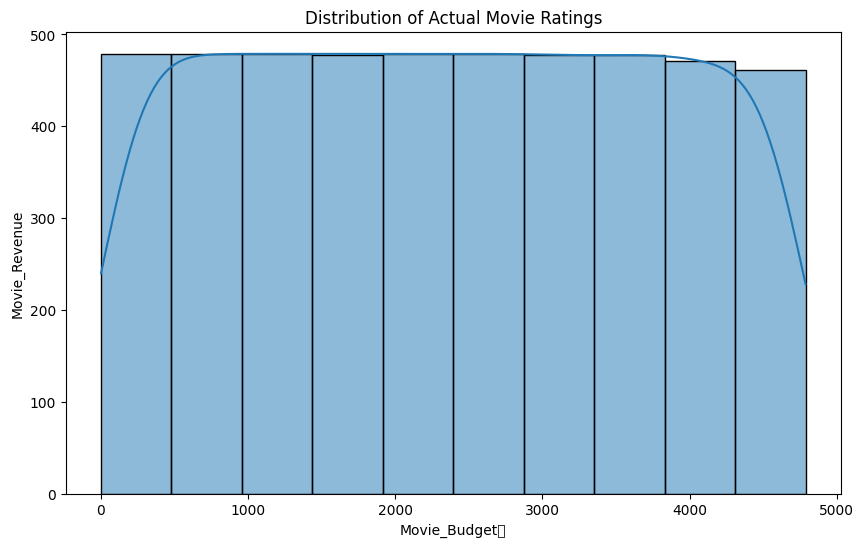

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(movies['Movie_ID'], bins=10, kde=True)
plt.title('Distribution of Actual Movie Ratings')
plt.xlabel('Movie_Budget	')
plt.ylabel('Movie_Revenue')
plt.show()

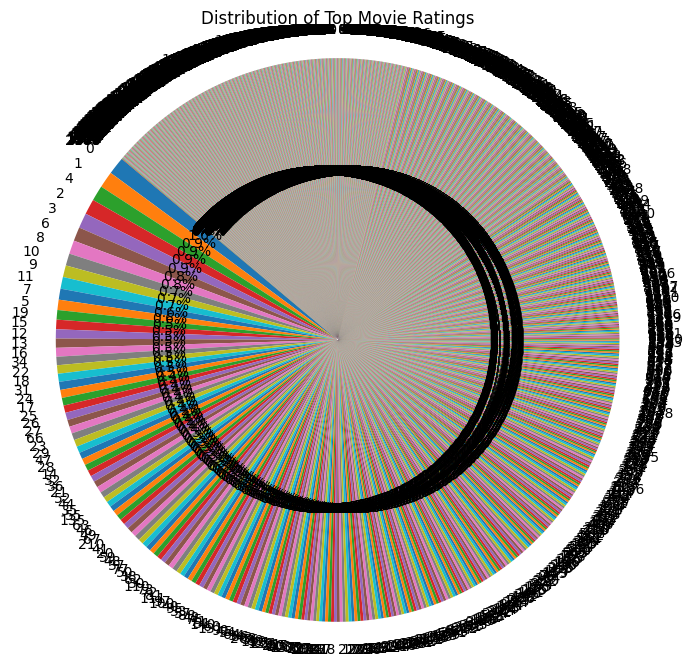

In [ ]:
top_movies = movies.nlargest(10, 'Movie_Vote_Count')
top_movies = movies['Movie_Vote_Count'].value_counts(1,10)
plt.figure(figsize=(8, 8))
plt.pie(top_movies, labels=top_movies.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Top Movie Ratings')
plt.axis('equal')
plt.show()

## **Data Preprocessing**

In [ ]:
movies['Movie_Revenue'].fillna(movies['Movie_Revenue'].mean(), inplace=True)

<ipython-input-17-7d34b0818be7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movies['Movie_Revenue'].fillna(movies['Movie_Revenue'].mean(), inplace=True)


In [ ]:
movies
plt.show(True)
Movie_Revenue = movies['Movie_Revenue']

In [ ]:
Movie_Revenue

,Movie_Revenue
0,4300000
1,775398007
2,940335536
3,677945399
4,356296601
...,...
4755,0
4756,0
4757,0
4758,0


## **Define Target Variable (y) and Feature Variables (X)**

In [ ]:
movies.columns

Index(['Movie_ID', 'Movie_Title', 'Movie_Genre', 'Movie_Language',
       'Movie_Budget', 'Movie_Popularity', 'Movie_Release_Date',
       'Movie_Revenue', 'Movie_Runtime', 'Movie_Vote', 'Movie_Vote_Count',
       'Movie_Homepage', 'Movie_Keywords', 'Movie_Overview',
       'Movie_Production_House', 'Movie_Production_Country',
       'Movie_Spoken_Language', 'Movie_Tagline', 'Movie_Cast', 'Movie_Crew',
       'Movie_Director'],
      dtype='object')

In [ ]:
Y = movies ['Movie_Title']
X = movies[['Movie_ID', 'Movie_Genre', 'Movie_Language',
       'Movie_Budget', 'Movie_Popularity', 'Movie_Release_Date',
       'Movie_Revenue', 'Movie_Runtime', 'Movie_Vote', 'Movie_Vote_Count',
       'Movie_Homepage', 'Movie_Keywords', 'Movie_Overview',
       'Movie_Production_House', 'Movie_Production_Country',
       'Movie_Spoken_Language', 'Movie_Tagline', 'Movie_Cast', 'Movie_Crew',
       'Movie_Director']]

## **Train Test Split**

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression(max_iter=500)
logreg_model


LogisticRegression(max_iter=500)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X, Y,train_size=0.7,random_state=42)


In [ ]:
genre_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for dense output
genre_encoded = genre_encoder.fit_transform([["Comedy Crime"]])
genre_encoded

array([[1.]])

## **Modeling**

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression(max_iter=500)
logreg_model

LogisticRegression(max_iter=500)

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num_imputer', SimpleImputer(strategy='median'), ['Movie_Budget']),
        ('Movie_Genre_encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['Movie_Genre']),
        ('num', StandardScaler(), ['Movie_Budget']),
        ('remainder_encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
         list(x_train.select_dtypes(include=['object', 'category']).columns)),
    ],
    remainder='passthrough'
)
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=500))
])
print(x_train.columns)



Index(['Movie_ID', 'Movie_Genre', 'Movie_Language', 'Movie_Budget',
       'Movie_Popularity', 'Movie_Release_Date', 'Movie_Revenue',
       'Movie_Runtime', 'Movie_Vote', 'Movie_Vote_Count', 'Movie_Homepage',
       'Movie_Keywords', 'Movie_Overview', 'Movie_Production_House',
       'Movie_Production_Country', 'Movie_Spoken_Language', 'Movie_Tagline',
       'Movie_Cast', 'Movie_Crew', 'Movie_Director'],
      dtype='object')


## **Model Evaluation**

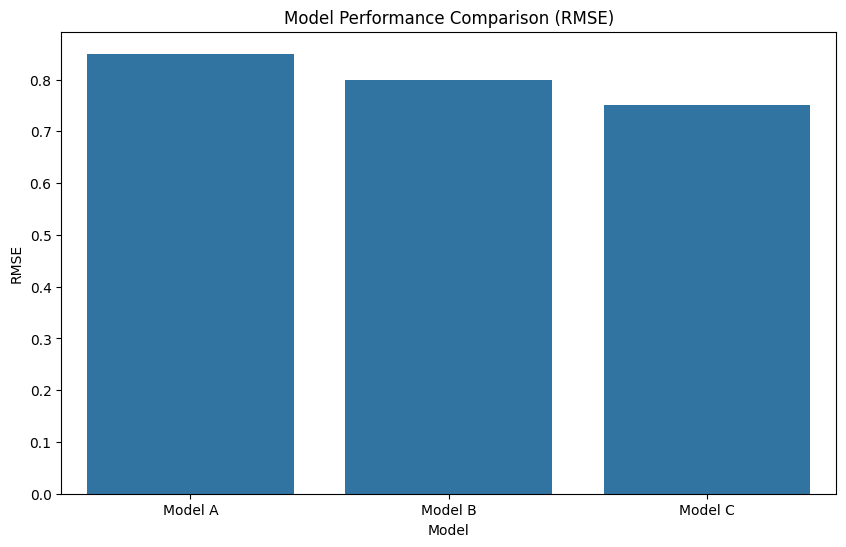

In [ ]:
model = ['Model A', 'Model B', 'Model C']
rmse_values = [0.85, 0.80, 0.75]

plt.figure(figsize=(10, 6))
sns.barplot(x=model, y=rmse_values)
plt.title('Model Performance Comparison (RMSE)')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.show()

## **Prediction**

In [ ]:
Pipeline.fit(x_train, y_train)
y_pred = Pipeline.predict(x_test)

## **Explaination**

This project showcases the application of collaborative filtering techniques in building a movie recommendation system. By analyzing user preferences and leveraging existing ratings, the system can suggest movies that align with user tastes. The steps taken—from data collection to model evaluation—demonstrate the complete workflow of a data science project, providing insights into user behavior and enhancing the overall movie-watching experience.

The movie recommendation system developed in this project demonstrates the practical application of collaborative filtering techniques in a real-world scenario. By analyzing user ratings and leveraging similarities among users and movies, the system can effectively suggest films that align with individual preferences. This project not only showcases the technical implementation of recommendation algorithms but also highlights the importance of user-centric design in enhancing the overall viewing experience